# Projeto - Employees Data

Vamos utilizar conceitos de manipulação de Data e Inteligência de Dados para criar um arquivo Power BI usando o DataFrame `employees_sample_data`

Com o arquivo gerado, ao final, retiraremos insights valiosos da empresa que nos forneceu esta base de dados


# 1- Primeiras Impressões

In [96]:
import pandas as pd
import seaborn as sns
import numpy as np

In [97]:
data = pd.read_excel('employee_sample_data.xlsx')
data.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EEID           1000 non-null   object        
 1   Full Name      1000 non-null   object        
 2   Job Title      1000 non-null   object        
 3   Department     1000 non-null   object        
 4   Business Unit  1000 non-null   object        
 5   Gender         1000 non-null   object        
 6   Ethnicity      1000 non-null   object        
 7   Age            1000 non-null   int64         
 8   Hire Date      1000 non-null   datetime64[ns]
 9   Annual Salary  1000 non-null   int64         
 10  Bonus %        1000 non-null   float64       
 11  Country        1000 non-null   object        
 12  City           1000 non-null   object        
 13  Exit Date      85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(9)
memory usage: 109.5

# 2- Formatação/Limpeza dos dados

- Limpeza de indices incorretos no `Job Title`

In [99]:
data['Job Title'] = data['Job Title'].apply(lambda x: 'Sr. Manager' if x == 'Sr. Manger' else x)
data['Job Title'] = data['Job Title'].apply(lambda x: 'System Administrator' if x == 'System Administrator\xa0' else x)

data.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manager,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


# 3- Manipulação de Dados

## 3.1- Coluna `Years of Service`

Vamos definir os Exit Date nulos como o dia de hoje para calcular os anos de serviços de todos os funcionários. Após isso, retornamos os valores nulos

In [100]:
import datetime

# transformando os valores nulos na data de hoje
data['Exit Date'].fillna(pd.to_datetime(datetime.date.today()), inplace=True)
data.head()

# calculo de anos de servico
data['Years of Service'] = round((data['Exit Date'] - data['Hire Date']).dt.days / 365, 1)

# transformando novamente o que for == data de hoje em NaN
data_de_hoje = datetime.date.today()
data.loc[data['Exit Date'] == pd.to_datetime(data_de_hoje), 'Exit Date'] = np.nan

## 3.2- Coluna `Hired`

Esta coluna retornará: \
 0 == funcionário **não** mais contratado \
 1 == funcionário ainda contratado

In [101]:
# condicionando q caso instancia for nula == 0
data['Hired'] = data['Exit Date'].apply(lambda x: 0 if pd.notna(x) else 1)

In [102]:
data.head(2)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,Years of Service,Hired
0,E02387,Emily Davis,Sr. Manager,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16,5.5,0
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT,26.2,1


## 3.3- Categorização de Funcionários

Vamos separar em categorias cada funcionário de acordo com o tempo de atividade na empresa: \
**vet** = Veterano \
**int** = Intermediário \
**new** = Novo 


Para isso, usaremos a coluna `Years of Service` para calcular o tempo de serviço dos funcionários;
Vamos criar também uma função que aplique a filtragem das instancias, para depois aplicarmos no DataFrame

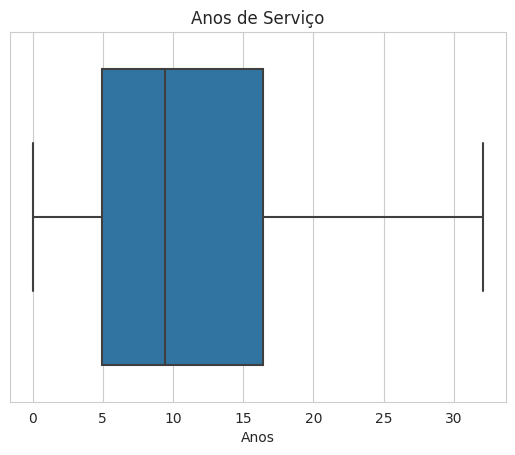

In [103]:
# verificando os anos de servico dos funcionarios da empresa
with sns.axes_style('whitegrid'):
  year_grafic = sns.boxplot(x=data['Years of Service'])
  year_grafic.set(title='Anos de Serviço', xlabel='Anos')

- A maioria dos funcionários acomulam/acomularam de 5 a 15 anos de permanência na empresa
- A média varia de 8 a 10 anos \
\
Com isso, vamos supor que até 5 anos ainda é uma pessoa bem nova na empresa, enquanto acima de 15 anos de empresa já é alguem bem mais familiarizado com o seu trabalho e ambiente.

Criando a função que categoriza os funcionários

In [104]:
def category_filter(years):
  if years <= 5:
    return 'New'
  elif years <= 15:
    return 'Intermediate'
  else:
    return 'Veteran'

Aplicando a função `category_filter`

In [105]:
# aplicando a funcao
data['Category'] = data['Years of Service'].apply(category_filter)
data.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,Years of Service,Hired,Category
0,E02387,Emily Davis,Sr. Manager,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16,5.5,0,Intermediate
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT,26.2,1,Veteran
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT,17.3,1,Veteran
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT,4.3,1,New
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT,28.2,1,Veteran


## 3.4- Retoques na estrutura do DataFrame

Vamos fazer as ultimas manipulações para deixar o DF mais fácil de retirar informações uteis

- Renomeação de colunas
- Ordenação do DF

In [110]:
# dict() para substituicao de colunas
columns_name = {'Job Title': 'Job',
               'Business Unit': 'Business',
               'Annual Salary': 'Salary',
               'Bonus %': 'Bonus'}
# aplicando o dict()
data = data.rename(columns=columns_name)

# reorganizando colunas
x = ['EEID','Job','Department','Business','Gender','Ethnicity','Age','Salary','Bonus','Country','Hire Date','Exit Date','Years of Service','Hired','Category']
data = data[x]

# alterando `Salary` como float
data['Salary'] = data['Salary'].astype(float)

# para evitar erros de indices ao importar os dados no BI,
# alteraremos os dados floats em str
data['Bonus'] = data['Bonus'].astype(str)
data['Years of Service'] = data['Years of Service'].astype(str)

# para evitarmos dados nulos na manipulação do BI, vamos definir
# as datas nulas como a data de hoje
data['Exit Date'].fillna(pd.to_datetime(datetime.date.today()), inplace=True)

# reordenando o DF pelos departamentos
data = data.sort_values(by=['Department','Business'])

In [111]:
data.head(2)

,EEID,Job,Department,Business,Gender,Ethnicity,Age,Salary,Bonus,Country,Hire Date,Exit Date,Years of Service,Hired,Category
168,E00085,Vice President,Accounting,Corporate,Female,Asian,56,190815.0,0.4,United States,2014-03-16,2024-01-29,9.9,1,Intermediate
231,E03547,Analyst,Accounting,Corporate,Male,Asian,28,52069.0,0.0,China,2017-05-12,2024-01-29,6.7,1,Intermediate


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 168 to 988
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   EEID              1000 non-null   object        
 1   Job               1000 non-null   object        
 2   Department        1000 non-null   object        
 3   Business          1000 non-null   object        
 4   Gender            1000 non-null   object        
 5   Ethnicity         1000 non-null   object        
 6   Age               1000 non-null   int64         
 7   Salary            1000 non-null   float64       
 8   Bonus             1000 non-null   object        
 9   Country           1000 non-null   object        
 10  Hire Date         1000 non-null   datetime64[ns]
 11  Exit Date         1000 non-null   datetime64[ns]
 12  Years of Service  1000 non-null   object        
 13  Hired             1000 non-null   int64         
 14  Category          1000 non-n

In [116]:
data.sort_values(by='Salary', ascending=False)

,EEID,Job,Department,Business,Gender,Ethnicity,Age,Salary,Bonus,Country,Hire Date,Exit Date,Years of Service,Hired,Category
989,E04354,Vice President,Sales,Manufacturing,Female,Latino,43,258498.0,0.35,United States,2016-08-21,2024-01-29,7.4,1,Intermediate
232,E04742,Vice President,Accounting,Corporate,Female,Latino,33,258426.0,0.4,Brazil,2020-12-16,2024-01-29,3.1,1,New
900,E02522,Vice President,Sales,Corporate,Male,Latino,48,258081.0,0.3,United States,2000-02-28,2024-01-29,23.9,1,Veteran
549,E01371,Vice President,Marketing,Corporate,Male,Asian,41,257194.0,0.35,China,2014-10-04,2024-01-29,9.3,1,Intermediate
610,E04170,Vice President,IT,Research & Development,Male,Asian,26,256561.0,0.39,United States,2020-05-09,2024-01-29,3.7,1,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,E02732,Analyst,Marketing,Corporate,Female,Asian,39,40897.0,0.0,United States,2014-07-29,2024-01-29,9.5,1,Intermediate
182,E03719,Analyst,Marketing,Corporate,Male,Caucasian,55,40752.0,0.0,United States,2004-12-07,2024-01-29,19.2,1,Veteran
823,E00862,Systems Analyst,IT,Research & Development,Male,Latino,64,40316.0,0.0,Brazil,2020-06-27,2024-01-29,3.6,1,New
782,E04109,IT Coordinator,IT,Manufacturing,Female,Caucasian,55,40124.0,0.0,United States,2004-04-30,2024-01-29,19.8,1,Veteran


# 4- Salvando o DF

Vamos gerar o arquivo `employees.csv` para utilizar posteriormente no Power BI como fonte de dados

In [113]:
data.to_csv('./employees.csv', sep=',', index=False)

# 5- Data Inteligence em PowerBI

Acesse o arquivo .pbix `data-analysis.pbix` disponivel no link a seguir para verificar as análises possíveis de serem feitas com nossos dados no Power BI

Com eles, segue alguns insights relevantes que pude retirar sobre esta empresa e sua composição de funcionários

**Composição de Funcionários por Sexo**
- ff
- ff



**Composição de Funcionários por Etnias**
- ff
- ff



**Permanência de Funcionários na Empresa**
- ff
- ff

